In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('dataset_sdn.csv')
data

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


In [3]:
data.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [4]:
data.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


## PREPROCESSING

### MINMAX SCALAR

In [5]:


minmaxscalar = MinMaxScaler()
data['dt'] = minmaxscalar.fit_transform(pd.DataFrame(data['dt']))
data['switch'] = minmaxscalar.fit_transform(pd.DataFrame(data['switch']))
data['pktcount'] = minmaxscalar.fit_transform(pd.DataFrame(data['pktcount']))
data['bytecount'] = minmaxscalar.fit_transform(pd.DataFrame(data['bytecount']))
data['tot_dur'] = minmaxscalar.fit_transform(pd.DataFrame(data['tot_dur']))
data['flows'] = minmaxscalar.fit_transform(pd.DataFrame(data['flows']))
data['packetins'] = minmaxscalar.fit_transform(pd.DataFrame(data['packetins']))
data['pktperflow'] = minmaxscalar.fit_transform(pd.DataFrame(data['pktperflow']))
data['byteperflow'] = minmaxscalar.fit_transform(pd.DataFrame(data['byteperflow']))
data['Pairflow'] = minmaxscalar.fit_transform(pd.DataFrame(data['Pairflow']))
data['tx_bytes'] = minmaxscalar.fit_transform(pd.DataFrame(data['tx_bytes']))
data['rx_bytes'] = minmaxscalar.fit_transform(pd.DataFrame(data['rx_bytes']))
data['tx_kbps'] = minmaxscalar.fit_transform(pd.DataFrame(data['tx_kbps']))
data['rx_kbps'] = minmaxscalar.fit_transform(pd.DataFrame(data['rx_kbps']))
data['tot_kbps'] = minmaxscalar.fit_transform(pd.DataFrame(data['tot_kbps']))
data['dur'] = minmaxscalar.fit_transform(pd.DataFrame(data['dur']))
data['tot_dur'] = minmaxscalar.fit_transform(pd.DataFrame(data['tot_dur']))
data['pktrate'] = minmaxscalar.fit_transform(pd.DataFrame(data['pktrate']))


### LABEL ENCODER

In [6]:

labelencoder = LabelEncoder()

data['src'] = labelencoder.fit_transform(pd.DataFrame(data['src']))
data['dst'] = labelencoder.fit_transform(pd.DataFrame(data['dst']))
data['Protocol'] = labelencoder.fit_transform(pd.DataFrame(data['Protocol']))


/home/kavesh/Documents/Minor/Introduction to ML/Project/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kavesh/Documents/Minor/Introduction to ML/Project/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kavesh/Documents/Minor/Introduction to ML/Project/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
data

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,0.220956,0.000000,0,16,0.174242,0.328245,0.053163,716000000,0.053723,0.066667,...,0.962430,0.0,2,3,1.133295e-01,3.090061e-06,0.000000,0.00000,0.000000,0
1,0.225406,0.000000,0,16,0.486123,0.915781,0.148857,734000000,0.149468,0.000000,...,0.962430,0.0,2,4,1.035450e-06,2.689292e-06,0.000000,0.00000,0.000000,0
2,0.220956,0.000000,10,16,0.347427,0.654498,0.106326,744000000,0.106915,0.066667,...,0.962430,0.0,2,1,9.984414e-07,3.896647e-07,0.000000,0.00000,0.000000,0
3,0.220956,0.000000,10,16,0.347427,0.654498,0.106326,744000000,0.106915,0.066667,...,0.962430,0.0,2,2,9.141880e-07,6.420382e-07,0.000000,0.00000,0.000000,0
4,0.220956,0.000000,10,16,0.347427,0.654498,0.106326,744000000,0.106915,0.066667,...,0.962430,0.0,2,3,6.976491e-07,2.835669e-06,0.000000,0.00000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,0.068584,0.222222,14,15,0.000304,0.000053,0.043062,842000000,0.043533,0.200000,...,0.872302,0.0,0,1,9.985988e-06,1.197664e-05,0.000049,0.00006,0.000097,0
104341,0.068584,0.222222,14,15,0.000304,0.000053,0.043062,842000000,0.043533,0.200000,...,0.872302,0.0,0,3,9.899373e-06,1.396837e-05,0.000049,0.00006,0.000097,0
104342,0.068584,0.222222,2,13,0.000119,0.000021,0.016481,805000000,0.016918,0.200000,...,0.872502,0.0,0,2,6.944994e-07,2.902295e-06,0.000000,0.00000,0.000000,0
104343,0.068584,0.222222,2,13,0.000119,0.000021,0.016481,805000000,0.016918,0.200000,...,0.872502,0.0,0,1,9.985988e-06,1.197664e-05,0.000049,0.00006,0.000097,0


In [8]:
data.describe()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,104345.000000,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,...,104345.000000,104345.000000,104345.000000,104345.000000,104345.000000,104345.000000,104345.000000,103839.000000,103839.000000,104345.000000
mean,0.381722,0.357140,9.189784,11.166007,0.203307,0.259547,0.170918,4.613880e+08,0.171216,0.243616,...,0.914710,0.600987,0.925890,2.331094,0.073426,0.094165,0.048537,0.060554,0.097550,0.390857
std,0.296132,0.217370,6.164935,5.162322,0.200085,0.331531,0.150727,2.770019e+08,0.150746,0.196669,...,0.049332,0.489698,0.844045,1.084333,0.119638,0.134263,0.117759,0.123960,0.152791,0.487945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.113976,0.222222,3.000000,10.000000,0.003108,0.000541,0.067517,2.340000e+08,0.067553,0.066667,...,0.872302,0.000000,0.000000,1.000000,0.000002,0.000003,0.000000,0.000000,0.000000,0.000000
50%,0.232823,0.333333,10.000000,13.000000,0.164719,0.043988,0.133440,4.180000e+08,0.134043,0.200000,...,0.927458,1.000000,1.000000,2.000000,0.003321,0.013510,0.000000,0.000000,0.000194,0.000000
75%,0.679012,0.444444,14.000000,15.000000,0.364592,0.517940,0.219032,7.030000e+08,0.219681,0.333333,...,0.938849,1.000000,2.000000,3.000000,0.106803,0.145293,0.012196,0.033601,0.186492,1.000000
max,1.000000,1.000000,18.000000,17.000000,1.000000,1.000000,1.000000,9.990000e+08,1.000000,1.000000,...,1.000000,1.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### CHI SQUARE TEST

<Axes: >

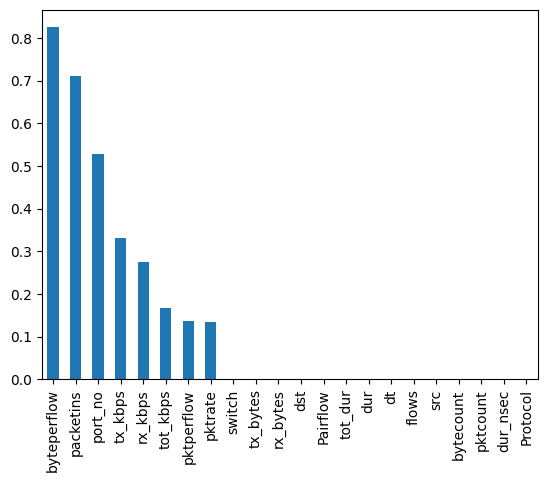

In [9]:
data.dropna(inplace=True)
feature = data.drop(columns=['label'])

chi_score = chi2(feature,data['label'])

p_values = pd.Series(chi_score[1],index = feature.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [10]:
feature = feature.drop(columns=['byteperflow','packetins','port_no','tx_kbps','rx_kbps','tot_kbps','pktperflow','pktrate'])


## MODEL EVALUATION

### MODELS VS TRAIN SIZE

0.55
                                               model  Accuracy  Precision        F1    Recall
0                             LogisticRegressionCV()  0.609699   0.000000  0.000000  0.000000
1                             KNeighborsClassifier()  0.853493   0.838886  0.804657  0.773111
2                                       GaussianNB()  0.609699   0.000000  0.000000  0.000000
3  (ExtraTreeClassifier(random_state=1209033876),...  0.999444   0.999452  0.999287  0.999123
4  (DecisionTreeClassifier(max_depth=1, random_st...  0.893875   0.890950  0.859203  0.829641
5  XGBClassifier(base_score=None, booster=None, c...  0.999208   0.999068  0.998986  0.998903



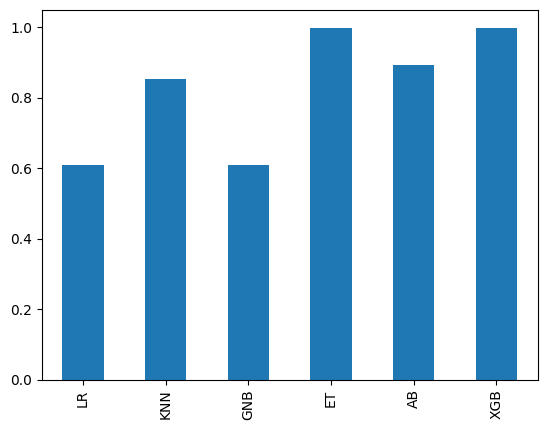

0.6
                                               model  Accuracy  Precision        F1    Recall
0                             LogisticRegressionCV()  0.611783   0.000000  0.000000  0.000000
1                             KNeighborsClassifier()  0.859712   0.846268  0.812002  0.780403
2                                       GaussianNB()  0.611783   0.000000  0.000000  0.000000
3  (ExtraTreeClassifier(random_state=261616826), ...  0.999591   0.999071  0.999473  0.999876
4  (DecisionTreeClassifier(max_depth=1, random_st...  0.895729   0.884420  0.862355  0.841364
5  XGBClassifier(base_score=None, booster=None, c...  0.999109   0.998451  0.998853  0.999256



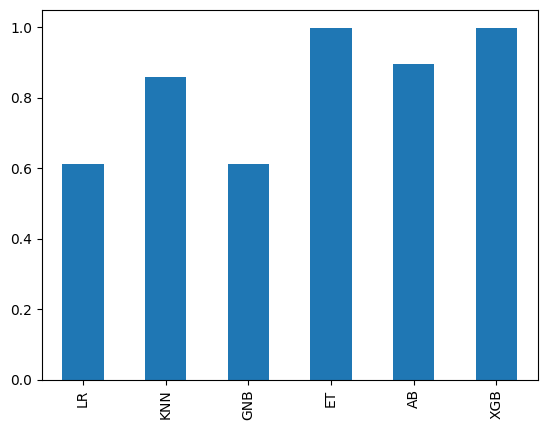

0.65
                                               model  Accuracy  Precision        F1    Recall
0                             LogisticRegressionCV()  0.613967   0.000000  0.000000  0.000000
1                             KNeighborsClassifier()  0.866113   0.846858  0.821366  0.797363
2                                       GaussianNB()  0.613967   0.000000  0.000000  0.000000
3  (ExtraTreeClassifier(random_state=883363911), ...  0.999780   0.999501  0.999715  0.999929
4  (DecisionTreeClassifier(max_depth=1, random_st...  0.914621   0.903956  0.887389  0.871418
5  XGBClassifier(base_score=None, booster=None, c...  0.998927   0.998007  0.998611  0.999216



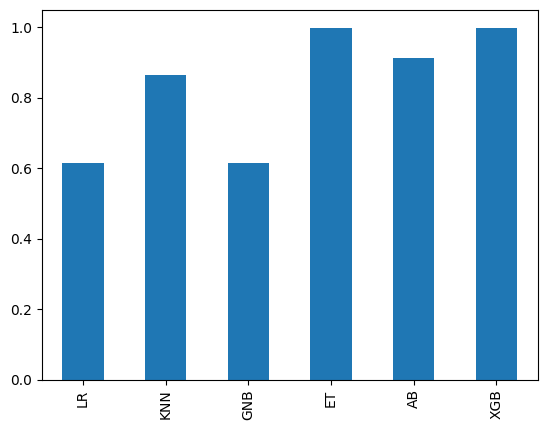

0.7
                                               model  Accuracy  Precision        F1    Recall
0                             LogisticRegressionCV()  0.606125   0.405983  0.030040  0.015597
1                             KNeighborsClassifier()  0.876509   0.867991  0.836347  0.806928
2                                       GaussianNB()  0.608950   0.000000  0.000000  0.000000
3  (ExtraTreeClassifier(random_state=874548417), ...  0.999647   0.999098  0.999549  1.000000
4  (DecisionTreeClassifier(max_depth=1, random_st...  0.900520   0.889527  0.870014  0.851338
5  XGBClassifier(base_score=None, booster=None, c...  0.998844   0.997705  0.998524  0.999343



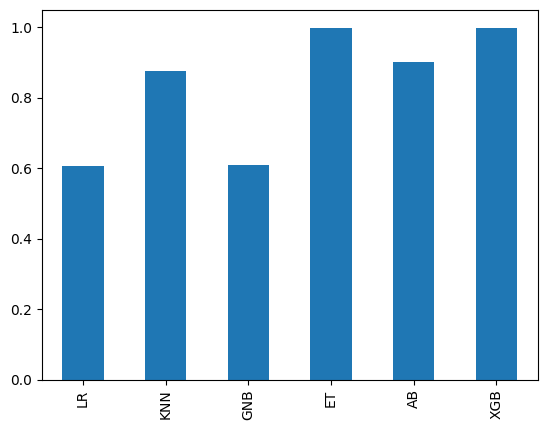

0.75
                                               model  Accuracy  Precision        F1    Recall
0                             LogisticRegressionCV()  0.610824   0.000000  0.000000  0.000000
1                             KNeighborsClassifier()  0.877966   0.866582  0.838053  0.811343
2                                       GaussianNB()  0.610824   0.000000  0.000000  0.000000
3  (ExtraTreeClassifier(random_state=647166898), ...  0.999961   0.999901  0.999951  1.000000
4  (DecisionTreeClassifier(max_depth=1, random_st...  0.909861   0.893143  0.882859  0.872810
5  XGBClassifier(base_score=None, booster=None, c...  0.998883   0.998023  0.998566  0.999109



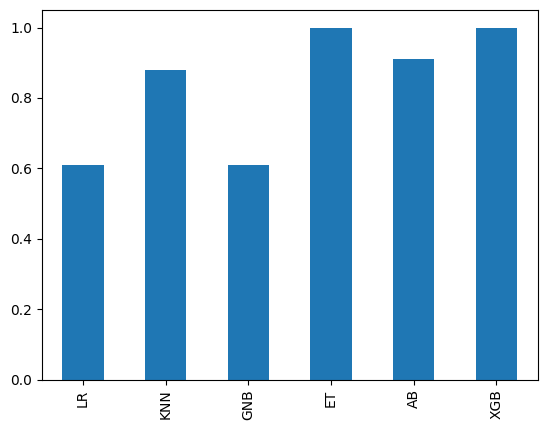

0.8
                                               model  Accuracy  Precision        F1    Recall
0                             LogisticRegressionCV()  0.613781   0.000000  0.000000  0.000000
1                             KNeighborsClassifier()  0.890023   0.880085  0.853289  0.828076
2                                       GaussianNB()  0.613781   0.000000  0.000000  0.000000
3  (ExtraTreeClassifier(random_state=1912340), Ex...  1.000000   1.000000  1.000000  1.000000
4  (DecisionTreeClassifier(max_depth=1, random_st...  0.904565   0.884014  0.875220  0.866600
5  XGBClassifier(base_score=None, booster=None, c...  0.999615   0.999751  0.999501  0.999252



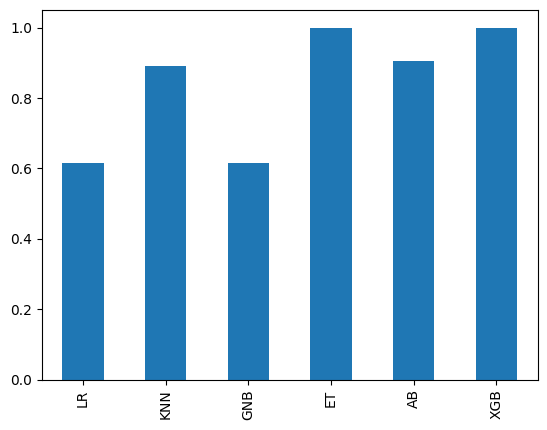

In [11]:
import warnings

warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.width', 1000)


testsize=[.55,.6,.65,.7,.75,.8]
models = [LogisticRegressionCV(),KNeighborsClassifier(),GaussianNB(),ExtraTreesClassifier(),AdaBoostClassifier(),XGBClassifier()]
results=[]
for size in testsize:
    X_train,X_test,Y_train,Y_test = train_test_split(feature,data['label'],train_size=size)
    result=[]
    for model in models:
        model.fit(X_train,Y_train)
        pred = model.predict(X_test)
        result.append([model,accuracy_score(Y_test,pred),precision_score(Y_test,pred),f1_score(Y_test,pred),recall_score(Y_test,pred)])
    print(size)
    result = pd.DataFrame(result)
    result.columns = ['model','Accuracy','Precision','F1','Recall']
    print(result.head(10))
    results.append(result)
    print()
    result['Accuracy'].plot.bar()
    plt.xticks(ticks=range(len(result)), labels=['LR','KNN','GNB','ET','AB','XGB'])
    plt.show()




### ENSEMBLE MODELS VS TRAIN SIZE

Voting Classifier
   size  Accuracy  Precision        F1    Recall
0  0.55  0.856917   0.999913  0.775094  0.632813
1  0.60  0.860266   1.000000  0.780218  0.639637
2  0.65  0.888015   1.000000  0.832538  0.713118
3  0.70  0.882736   0.999883  0.823722  0.700336
4  0.75  0.878544   1.000000  0.816483  0.689879
5  0.80  0.883523   0.999475  0.825179  0.702646


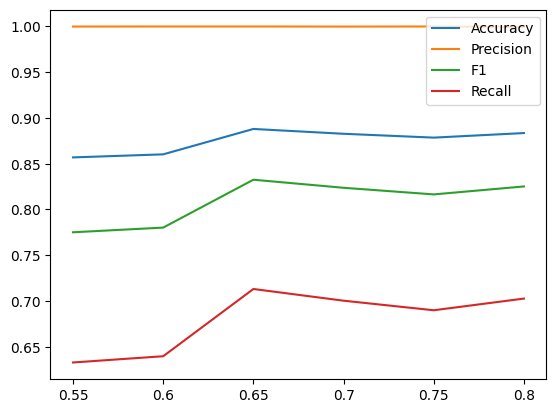

In [12]:

testsize=[.55,.6,.65,.7,.75,.8]
result=[]
print('Voting Classifier')
for size in testsize:
    X_train,X_test,Y_train,Y_test = train_test_split(feature,data['label'],train_size=size)
    clf = VotingClassifier(estimators=[('lr',LogisticRegressionCV()),('knn',KNeighborsClassifier()),('naive',GaussianNB()),('et',ExtraTreesClassifier()),('adaboost',AdaBoostClassifier()),('xgb',XGBClassifier()),])
    clf.fit(X_train,Y_train)
    pred = clf.predict(X_test)
    result.append([size,accuracy_score(Y_test,pred),precision_score(Y_test,pred),f1_score(Y_test,pred),recall_score(Y_test,pred)])
result = pd.DataFrame(result)
result.columns = ['size','Accuracy','Precision','F1','Recall']
print(result)
result.drop(columns='size').plot.line()
plt.xticks(ticks=range(len(result)), labels=result['size'])
plt.show()


<class 'list'>
Stacking Classifier
   size  Accuracy  Precision        F1    Recall
0  0.55  0.999486   0.999615  0.999339  0.999064
1  0.60  0.999446   0.999016  0.999292  0.999569
2  0.65  0.999477   0.999506  0.999330  0.999154
3  0.70  0.999872   0.999671  0.999835  1.000000
4  0.75  0.999499   0.998916  0.999359  0.999803
5  0.80  0.999856   0.999626  0.999813  1.000000


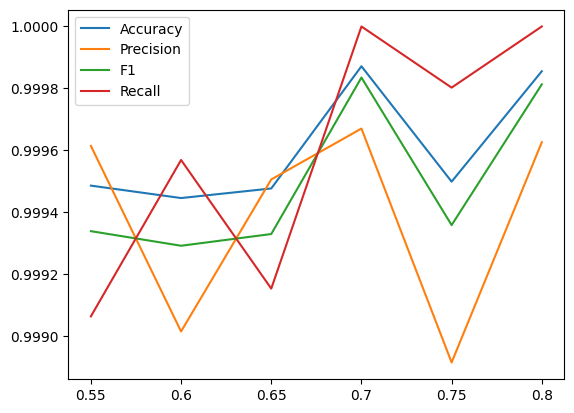

In [13]:


testsize=[.55,.6,.65,.7,.75,.8]
result=[]
print(type(result))
print('Stacking Classifier')
for size in testsize:
    X_train,X_test,Y_train,Y_test = train_test_split(feature,data['label'],train_size=size)
    clf = StackingClassifier(estimators=[('lr',LogisticRegressionCV()),('knn',KNeighborsClassifier()),('naive',GaussianNB()),('et',ExtraTreesClassifier()),('adaboost',AdaBoostClassifier()),('xgb',XGBClassifier()),])
    clf.fit(X_train,Y_train)
    pred = clf.predict(X_test)
    result.append([size,accuracy_score(Y_test,pred),precision_score(Y_test,pred),f1_score(Y_test,pred),recall_score(Y_test,pred)])
result = pd.DataFrame(result)
result.columns = ['size','Accuracy','Precision','F1','Recall']
print(result)

result.drop(columns='size').plot.line()
plt.xticks(ticks=range(len(result)), labels=result['size'])
plt.show()


### MODELS WITH CROSS VALIDATION

   cv        LR       KNN       GNB        ET        AB       XGB
0   4  0.609935  0.526469  0.609935  0.624670  0.553705  0.644316
1   5  0.596106  0.535627  0.609935  0.667303  0.625566  0.701462
2   6  0.608760  0.544979  0.609935  0.700654  0.691611  0.724093
3   7  0.609906  0.532950  0.609935  0.669113  0.641763  0.695567
4   8  0.609935  0.534538  0.609935  0.733628  0.677628  0.718806
5   9  0.614750  0.543793  0.609935  0.781708  0.716474  0.774909
6  10  0.609935  0.545642  0.609935  0.796061  0.717873  0.777898


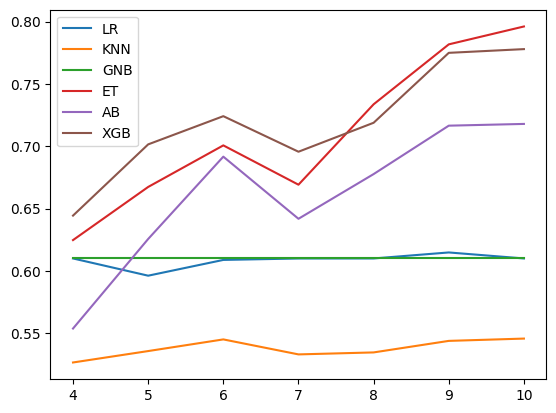

In [15]:


models = [LogisticRegressionCV(),KNeighborsClassifier(),GaussianNB(),ExtraTreesClassifier(),AdaBoostClassifier(),XGBClassifier()]
results=[]
for c in range(4,11):
    result=[]
    result.append(c)
    for model in models:
        result.append(np.mean(cross_val_score(model,feature,data['label'],cv=c)))
    results.append(result)

results = pd.DataFrame(results)
results.columns = ['cv','LR','KNN','GNB','ET','AB','XGB']
print(results)

results.drop(columns='cv').plot.line()
plt.xticks(ticks=range(len(results)), labels=results['cv'])
plt.show()